# <font color = 'green'> Pull common_stock from class server to local database.
Replicate the databases and tables we need from the class server to local server. 
We will use *common_goods* database in this project, which contains the MF prospectus data extracted from 13F files.</font>

In [73]:
from installdatabase import *

In [2]:
class_clickhouse_query('show databases')

Elapsed time: 0 days 00:00:00.005801 seconds


,name
0,brokercheck_final
1,common_goods
2,comp
3,comp_snapshot
4,crsp
5,factset_common
6,factset_common_2022
7,factset_own_2022
8,ff
9,hw


In [5]:
class_clickhouse_query('show tables in common_goods')

Elapsed time: 0 days 00:00:00 seconds


,name
0,datastream
1,derived_sec_fund_characteristics
2,ravenpack_2021
3,sec_risk_cal
4,sec_risk_lab
5,sec_risk_num
6,sec_risk_sub
7,sec_risk_tag
8,sec_risk_txt


In [74]:
#create local database
clickhouse_query('create database if not exists common_goods')
clickhouse_query('show databases')

Elapsed time: 0 days 00:00:00 seconds
Elapsed time: 0 days 00:00:00 seconds


,name
0,INFORMATION_SCHEMA
1,common_goods
2,crsp
3,default
4,information_schema
5,instown
6,reprisk_new
7,system


## <font color='green'> derived_sec_fund_characteristics </font>

In [6]:
clickhouse_query('''
create table if not exists common_goods.derived_sec_fund_characteristics Engine=MergeTree ORDER BY tuple() as
select * from remote('147.8.113.116:29000', common_goods.derived_sec_fund_characteristics,'class','alanisthecoolest123')
''')

Elapsed time: 0 days 00:00:00 seconds


""


In [7]:
clickhouse_query('select * from common_goods.derived_sec_fund_characteristics limit 5')

Elapsed time: 0 days 00:00:00 seconds


,row,cik_expanded,adsh,series,class,TradingSymbol,ExpenseHeading,ObjectiveHeading,ObjectivePrimaryTextBlock,PerformanceAvailabilityWebSiteAddress,...,pdate,effdate,form,filed,accepted,instance,nciks,aciks,file,aciks2
0,1,5138,0000005138-17-000045,S000012125,,<NA>,Fee Table,Investment Objectives/Goals,The Fund&#180;s primary objective is growth of...,www.americangrowthfund.com,...,20170330,20170412,485BPOS,20170501,2017-05-01 12:20:00,agfi-20170412.xml,1,,/home/alan/sec/2017q2_rr1/sub.tsv,5138
1,2,12601,0000012601-17-000043,S000056528,,<NA>,Fees and Expenses of the Account,Objective:,The Account seeks to provide as high a level o...,www.principal.com,...,20170227,20170227,485BPOS,20170315,2017-03-15 16:27:00,ck0000898745-20161231.xml,1,,/home/alan/sec/2017q1_rr1/sub.tsv,12601
2,3,12601,0000012601-17-000043,S000056529,,<NA>,Fees and Expenses of the Account,Objective:,The Account seeks to provide long-term capital...,www.principal.com,...,20170227,20170227,485BPOS,20170315,2017-03-15 16:27:00,ck0000898745-20161231.xml,1,,/home/alan/sec/2017q1_rr1/sub.tsv,12601
3,4,30146,0000030146-17-000010,S000000068,,<NA>,Fees and Expenses,Investment Objective,The fund seeks long-term capital growth consis...,www.dreyfus.com,...,20170501,20170501,485BPOS,20170511,2017-05-11 10:18:00,ck0000030146-20170427.xml,1,,/home/alan/sec/2017q2_rr1/sub.tsv,30146
4,5,30146,0000030146-20-000011,S000000068,,<NA>,Fees and Expenses,Investment Objective,The fund seeks long-term capital growth consis...,www.bnymellonim.com/us,...,20200501,20200501,485BPOS,20200508,2020-05-08 08:45:00,ck0000030146-20200424.xml,1,,/home/alan/sec/2020q2_rr1/sub.tsv,30146


In [8]:
clickhouse_query('describe table common_goods.derived_sec_fund_characteristics')

Elapsed time: 0 days 00:00:00.001005 seconds


,name,type,default_type,default_expression,comment,codec_expression,ttl_expression
0,row,Nullable(Int32),,,,,
1,cik_expanded,Nullable(String),,,,,
2,adsh,Nullable(String),,,,,
3,series,Nullable(String),,,,,
4,class,Nullable(String),,,,,
5,TradingSymbol,Nullable(String),,,,,
6,ExpenseHeading,Nullable(String),,,,,
7,ObjectiveHeading,Nullable(String),,,,,
8,ObjectivePrimaryTextBlock,Nullable(String),,,,,
9,PerformanceAvailabilityWebSiteAddress,Nullable(String),,,,,


Check out raw data.

In [76]:
clickhouse_query('''
    select min(pdate) as min_date,
    max(pdate) as max_date,
    count(distinct name) as no_funds,
    count(distinct adsh) as no_of_files
    from common_goods.derived_sec_fund_characteristics
    where ObjectivePrimaryTextBlock is not null and StrategyNarrativeTextBlock is not null
    and ObjectivePrimaryTextBlock != '' and StrategyNarrativeTextBlock != ''
    ''')

Elapsed time: 0 days 00:00:00 seconds


,min_date,max_date,no_funds,no_of_files
0,20151208,20220609,1561,1562


In [10]:
fund_objectives_strategy_raw = clickhouse_query('''
select distinct adsh, cik_expanded, name,
pdate as period_end_date,
ObjectivePrimaryTextBlock as objective,
StrategyNarrativeTextBlock as strategy

from common_goods.derived_sec_fund_characteristics

where ObjectivePrimaryTextBlock is not null and StrategyNarrativeTextBlock is not null
and ObjectivePrimaryTextBlock != '' and StrategyNarrativeTextBlock != ''

order by cik_expanded, pdate asc
''').drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

Elapsed time: 0 days 00:00:00 seconds


In [11]:
import os
import pickle

path = r'C:\Users\zhaoz\Desktop\bigdata\finalproject\data'

#save the table containing raw texts as pickle file
with open(path + os.sep + 'fund_objectives_strategy_raw.pkl','wb') as f1:
    pickle.dump(fund_objectives_strategy_raw, f1)

*Ref:*

https://www.sec.gov/page/edgar-glossary </br>
https://www.investor.gov/introduction-investing/investing-basics/glossary/mutual-fund-classes

# <font color = 'green'> Read the raw data and do priliminary text cleaning.</font>

In [12]:
import os
import pickle
import pandas as pd
import re

path = r'C:\Users\zhaoz\Desktop\bigdata\finalproject\data'

In [13]:
#read raw data
f = open(path + os.sep + 'fund_objectives_strategy_raw.pkl','rb')
fund_objectives_strategy_raw = pickle.load(f)

In [14]:
fund_objectives_strategy_raw.head()

,adsh,cik_expanded,name,period_end_date,objective,strategy
0,0000930413-17-001900,1000249,FIRST EAGLE VARIABLE FUNDS,20170430,First Eagle Overseas Variable Fund (the Fund) ...,"To achieve its objective, the Fund will invest..."
1,0001133228-17-002371,1002427,MORGAN STANLEY MULTI CAP GROWTH TRUST,20170331,"Morgan Stanley Multi Cap Growth Trust (the """"F...",The Fund will normally invest at least 65% of ...
2,0001133228-19-002207,1002427,MORGAN STANLEY INSIGHT FUND,20190329,"Morgan Stanley Insight Fund (the ""Fund"") seeks...","Under normal circumstances, the Fund's assets ..."
3,0000894189-17-000238,1002537,NEEDHAM FUNDS INC,20161229,The Needham Growth Fund (the Growth Fund) seek...,"Under normal conditions, the Growth Fund inves..."
4,0000894189-17-000238,1002537,NEEDHAM FUNDS INC,20161229,The Needham Aggressive Growth Fund (the Aggres...,"Under normal conditions, the Aggressive Growth..."


In [15]:
fund_objectives_strategy_raw.shape

(6469, 6)

In [16]:
# define context specific keywords not to include in topic modelling

#we would ignore the fund name when classifying strategies

def get_items(target_string_list):
    items = []
    for i in target_string_list:
        lower_i = str.lower(i)
        items.append(lower_i)
    
    return list(set(items))

fund_names = get_items(fund_objectives_strategy_raw['name']) #convert the dataframe to list

In [17]:
#%pip install -U nltk
from nltk.corpus import stopwords
from tqdm import tqdm

cachedStopWords = stopwords.words("english") #caching the stopwords object to boost the processing speed

def word_reduction(target_string_list):
    main_texts = []
    for i in tqdm(target_string_list):
        #lower case
        lower_text = str.lower(i)
        #remove strings in fund name
        for name in fund_names:
            lower_text = lower_text.replace(name, ' ')
        #remove special characters
        cleaned_text = re.sub('[^A-Za-z]+', ' ', lower_text).replace("_", '') 
        #remove stopwords
        cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in cachedStopWords])
        main_texts.append(cleaned_text)
    return main_texts

cleaned_objective = word_reduction(fund_objectives_strategy_raw['objective'])
cleaned_strategy = word_reduction(fund_objectives_strategy_raw['strategy'])

100%|██████████| 6469/6469 [00:28<00:00, 228.41it/s]


In [18]:
#combine objective and strategy to strengthen the text analysis
cleaned_objective_strategy = [cleaned_objective[i] + ' ' + cleaned_strategy[i] for i in range(len(cleaned_objective))]

In [19]:
#check the data length
print(len(cleaned_objective_strategy))

6469


In [20]:
cleaned_text = pd.concat(
    [fund_objectives_strategy_raw,
     pd.DataFrame(cleaned_objective_strategy,columns=['cleaned_objective_strategy'])], axis=1)

cleaned_text.head()

,adsh,cik_expanded,name,period_end_date,objective,strategy,cleaned_objective_strategy
0,0000930413-17-001900,1000249,FIRST EAGLE VARIABLE FUNDS,20170430,First Eagle Overseas Variable Fund (the Fund) ...,"To achieve its objective, the Fund will invest...",first eagle overseas variable fund fund seeks ...
1,0001133228-17-002371,1002427,MORGAN STANLEY MULTI CAP GROWTH TRUST,20170331,"Morgan Stanley Multi Cap Growth Trust (the """"F...",The Fund will normally invest at least 65% of ...,fund seeks long term capital appreciation fund...
2,0001133228-19-002207,1002427,MORGAN STANLEY INSIGHT FUND,20190329,"Morgan Stanley Insight Fund (the ""Fund"") seeks...","Under normal circumstances, the Fund's assets ...",fund seeks long term capital appreciation norm...
3,0000894189-17-000238,1002537,NEEDHAM FUNDS INC,20161229,The Needham Growth Fund (the Growth Fund) seek...,"Under normal conditions, the Growth Fund inves...",needham growth fund growth fund seeks long ter...
4,0000894189-17-000238,1002537,NEEDHAM FUNDS INC,20161229,The Needham Aggressive Growth Fund (the Aggres...,"Under normal conditions, the Aggressive Growth...",needham aggressive growth fund aggressive grow...


In [21]:
with open(path + os.sep + 'cleaned_text.pkl','wb') as f2:
    pickle.dump(cleaned_text, f2)

# <font color = 'green'> Use pretrained BERT model to do classification. </font>

Here we use an established model pretraned FinBERT ESG model, which can classify the text into 9 categories.

* Climate Change
* Pollution & Waste
* Corporate Governance
* Natural Capital
* Product Liability
* Human Capital
* Business Ethics & Values
* Community Relations
* Non-ESG

*Source:*</br>
https://huggingface.co/yiyanghkust/finbert-esg-9-categories</br>
https://www.allenhuang.org/uploads/2/6/5/5/26555246/esg_9-class_descriptions.pdf
</font>

In [22]:
import os
import pickle
import pandas as pd
import re
import tqdm as notebook_tqdm
from tqdm import tqdm, trange
import transformers
from transformers import BertTokenizer, BertForSequenceClassification, pipeline

c:\Users\zhaoz\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
path = r'C:\Users\zhaoz\Desktop\bigdata\finalproject\data'

#read raw data
f = open(path + os.sep + 'cleaned_text.pkl','rb')
cleaned_text = pickle.load(f)

In [24]:
print('number of observations: ', len(cleaned_text['cleaned_objective_strategy']))
print('max length of string: ', len(max(cleaned_text['cleaned_objective_strategy'], key=len)))

number of observations:  6469
max length of string:  17034


In [25]:
finbert_esg_c = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-esg-9-categories',num_labels=9)
finbert_esg_tokenizer_c = BertTokenizer.from_pretrained('yiyanghkust/finbert-esg-9-categories')
finbert_esg_classifier = pipeline("text-classification", model=finbert_esg_c, tokenizer=finbert_esg_tokenizer_c)

In [26]:
#a function to cut the text into blocks of fixed lenth
def cut_text(text,lenth):
  textArr = re.findall(r'.{' + str(lenth) + '}', text)
  textArr.append(text[(len(textArr)*lenth):])
  return textArr

#esg classifier based on finbert model
def classifier(s,max_len):
  if len(s) < max_len:
    result = finbert_esg_classifier(s)
    if result[0]['score'] < 0.70:
      result[0]['label'] = 'Non-ESG'
    return result
    
  else:
    #print(len(s))
    s = cut_text(s,max_len)
    results = []
    for block in s:
      result = finbert_esg_classifier(block)
      if result[0]['score'] < 0.70:
        result[0]['label'] = 'Non-ESG'
      results.append(result)
    
    return max(results, key=lambda d: d[0]['score'])

labels = []

for s in tqdm(cleaned_text['cleaned_objective_strategy']):
  try:
    #greedy classifier
    label = classifier(s,3900)
  except:
    #conservative classifier
    label = classifier(s,3000)
  labels.append(label)

#save labels as pickle file after finished classification
with open(path + os.sep + 'labels.pkl','wb') as f3:
    pickle.dump(labels, f3)

100%|██████████| 6469/6469 [1:52:06<00:00,  1.04s/it]  


In [38]:
esg_labels = [l[0]['label'] for l in labels]

labelled_text = pd.concat(
    [cleaned_text,
     pd.DataFrame(esg_labels,columns=['esg_labels'])], axis=1)

print(labelled_text.shape)
labelled_text.head()

(6469, 8)


,adsh,cik_expanded,name,period_end_date,objective,strategy,cleaned_objective_strategy,esg_labels
0,0000930413-17-001900,1000249,FIRST EAGLE VARIABLE FUNDS,20170430,First Eagle Overseas Variable Fund (the Fund) ...,"To achieve its objective, the Fund will invest...",first eagle overseas variable fund fund seeks ...,Non-ESG
1,0001133228-17-002371,1002427,MORGAN STANLEY MULTI CAP GROWTH TRUST,20170331,"Morgan Stanley Multi Cap Growth Trust (the """"F...",The Fund will normally invest at least 65% of ...,fund seeks long term capital appreciation fund...,Non-ESG
2,0001133228-19-002207,1002427,MORGAN STANLEY INSIGHT FUND,20190329,"Morgan Stanley Insight Fund (the ""Fund"") seeks...","Under normal circumstances, the Fund's assets ...",fund seeks long term capital appreciation norm...,Non-ESG
3,0000894189-17-000238,1002537,NEEDHAM FUNDS INC,20161229,The Needham Growth Fund (the Growth Fund) seek...,"Under normal conditions, the Growth Fund inves...",needham growth fund growth fund seeks long ter...,Non-ESG
4,0000894189-17-000238,1002537,NEEDHAM FUNDS INC,20161229,The Needham Aggressive Growth Fund (the Aggres...,"Under normal conditions, the Aggressive Growth...",needham aggressive growth fund aggressive grow...,Non-ESG


In [ ]:
#save te labelled text as pickle file
with open(path + os.sep + 'common_goods.fund_objectives_strategy_with_labels.pkl','wb') as f4:
    pickle.dump(labelled_text, f4)

# <font color = 'green'> Create tables in local database.</font>

In [9]:
import os
import pickle

path = r'C:\Users\zhaoz\Desktop\bigdata\finalproject\data'

In [ ]:
#%pip install --upgrade pandas

#read raw data
f = open(path + os.sep + 'common_goods.fund_objectives_strategy_with_labels.pkl','rb')
labelled_text = pickle.load(f)

In [41]:
#save labelled text as parquet file for dumping it into local database
#%pip install pyarrow
labelled_text.to_parquet(path + os.sep + 'common_goods.fund_objectives_strategy_with_labels.parquet')

Upload local parquet files to docker container under /var/lib/clickhouse/user_files/data.
![upload local files to docker container](../img/uploadlocalfilestodocker.png "upload local files to docker container") </br>

In [128]:
#create table as fund_objectives_strategy_with_labels in local database common_goods

from installdatabase import *

clickhouse_query('drop table if exists common_goods.fund_objectives_strategy_with_labels')

clickhouse_query('''
create table if not exists common_goods.fund_objectives_strategy_with_labels
Engine = MergeTree()
ORDER BY tuple() AS
SELECT *
FROM file('data/common_goods.fund_objectives_strategy_with_labels.parquet', Parquet)
''')

Elapsed time: 0 days 00:00:00 seconds
Elapsed time: 0 days 00:00:00 seconds


""


In [47]:
clickhouse_query('''
select * from common_goods.fund_objectives_strategy_with_labels limit 5
''')

Elapsed time: 0 days 00:00:00 seconds


,adsh,cik_expanded,name,period_end_date,objective,strategy,cleaned_objective_strategy,esg_labels,__index_level_0__
0,0000930413-17-001900,1000249,FIRST EAGLE VARIABLE FUNDS,20170430,First Eagle Overseas Variable Fund (the Fund) ...,"To achieve its objective, the Fund will invest...",first eagle overseas variable fund fund seeks ...,Non-ESG,0
1,0001133228-17-002371,1002427,MORGAN STANLEY MULTI CAP GROWTH TRUST,20170331,"Morgan Stanley Multi Cap Growth Trust (the """"F...",The Fund will normally invest at least 65% of ...,fund seeks long term capital appreciation fund...,Non-ESG,1
2,0001133228-19-002207,1002427,MORGAN STANLEY INSIGHT FUND,20190329,"Morgan Stanley Insight Fund (the ""Fund"") seeks...","Under normal circumstances, the Fund's assets ...",fund seeks long term capital appreciation norm...,Non-ESG,2
3,0000894189-17-000238,1002537,NEEDHAM FUNDS INC,20161229,The Needham Growth Fund (the Growth Fund) seek...,"Under normal conditions, the Growth Fund inves...",needham growth fund growth fund seeks long ter...,Non-ESG,3
4,0000894189-17-000238,1002537,NEEDHAM FUNDS INC,20161229,The Needham Aggressive Growth Fund (the Aggres...,"Under normal conditions, the Aggressive Growth...",needham aggressive growth fund aggressive grow...,Non-ESG,4


In [49]:
#create table like common_goods.fund_objectives_strategy_with_labels
#only keep-related strategies

clickhouse_query('drop table if exists common_goods.fund_objectives_strategy_with_labels_only_esg')

clickhouse_query('''
create table common_goods.fund_objectives_strategy_with_labels_only_esg 
ENGINE = MergeTree()
ORDER BY tuple() AS
SELECT * FROM common_goods.fund_objectives_strategy_with_labels
where esg_labels != 'Non-ESG'

''')

Elapsed time: 0 days 00:00:00 seconds
Elapsed time: 0 days 00:00:00 seconds


""


In [17]:
#save to pickle file
strategy_descriptions_esg_related = clickhouse_query('''
select * from common_goods.fund_objectives_strategy_with_labels_only_esg
''')

with open(path + os.sep + 'strategy_descriptions_esg_related.pkl','wb') as f5:
    pickle.dump(strategy_descriptions_esg_related, f5)

Elapsed time: 0 days 00:00:00.001001 seconds


In [55]:
#create table like common_goods.fund_objectives_strategy_with_labels
#only keep-related strategies

clickhouse_query('drop table if exists common_goods.fund_objectives_strategy_with_labels_not_esg')

clickhouse_query('''
create table common_goods.fund_objectives_strategy_with_labels_not_esg 
ENGINE = MergeTree()
ORDER BY tuple() AS
SELECT * FROM common_goods.fund_objectives_strategy_with_labels
where esg_labels = 'Non-ESG'
''')

Elapsed time: 0 days 00:00:00.001009 seconds
Elapsed time: 0 days 00:00:00 seconds


""


In [152]:
clickhouse_query('''
ALTER TABLE common_goods.fund_objectives_strategy_with_labels 
ADD COLUMN IF NOT EXISTS year Int32 DEFAULT 0 AFTER period_end_date
''')

clickhouse_query('''
ALTER TABLE common_goods.fund_objectives_strategy_with_labels
UPDATE year = round(period_end_date/10000)
WHERE period_end_date is not null
''')

clickhouse_query('select * from common_goods.fund_objectives_strategy_with_labels limit 5')

Elapsed time: 0 days 00:00:00 seconds
Elapsed time: 0 days 00:00:00.001001 seconds
Elapsed time: 0 days 00:00:00 seconds


,adsh,cik_expanded,name,period_end_date,year,objective,strategy,cleaned_objective_strategy,esg_labels,__index_level_0__
0,0000930413-17-001900,1000249,FIRST EAGLE VARIABLE FUNDS,20170430,2017,First Eagle Overseas Variable Fund (the Fund) ...,"To achieve its objective, the Fund will invest...",first eagle overseas variable fund fund seeks ...,Non-ESG,0
1,0001133228-17-002371,1002427,MORGAN STANLEY MULTI CAP GROWTH TRUST,20170331,2017,"Morgan Stanley Multi Cap Growth Trust (the """"F...",The Fund will normally invest at least 65% of ...,fund seeks long term capital appreciation fund...,Non-ESG,1
2,0001133228-19-002207,1002427,MORGAN STANLEY INSIGHT FUND,20190329,2019,"Morgan Stanley Insight Fund (the ""Fund"") seeks...","Under normal circumstances, the Fund's assets ...",fund seeks long term capital appreciation norm...,Non-ESG,2
3,0000894189-17-000238,1002537,NEEDHAM FUNDS INC,20161229,2016,The Needham Growth Fund (the Growth Fund) seek...,"Under normal conditions, the Growth Fund inves...",needham growth fund growth fund seeks long ter...,Non-ESG,3
4,0000894189-17-000238,1002537,NEEDHAM FUNDS INC,20161229,2016,The Needham Aggressive Growth Fund (the Aggres...,"Under normal conditions, the Aggressive Growth...",needham aggressive growth fund aggressive grow...,Non-ESG,4


In [166]:
#only select the last entry for each fund in each year
last_entry = clickhouse_query('''
select * from (
    select *, row_number() over (partition by adsh, year order by period_end_date desc) as rn
    from common_goods.fund_objectives_strategy_with_labels
    )
where rn = 1
order by adsh, year
''')

last_entry.head()

Elapsed time: 0 days 00:00:00 seconds


,adsh,cik_expanded,name,period_end_date,year,objective,strategy,cleaned_objective_strategy,esg_labels,__index_level_0__,rn
0,0000005138-17-000045,5138,AMERICAN GROWTH FUND INC,20170330,2017,The Fund&#180;s primary objective is growth of...,"Investment Research Corporation (the """"Adviser...",fund primary objective growth capital investme...,Non-ESG,3352,1
1,0000012601-17-000043,12601,PRINCIPAL VARIABLE CONTRACTS FUNDS INC,20170227,2017,The Account seeks to provide as high a level o...,The Account operates as a fund of funds and in...,account seeks provide high level total return ...,Non-ESG,1444,1
2,0000030146-17-000010,30146,DREYFUS FUND INC,20170501,2017,The fund seeks long-term capital growth consis...,"To pursue its goals, the fund primarily invest...",fund seeks long term capital growth consistent...,Corporate Governance,3078,1
3,0000030146-20-000011,30146,"BNY MELLON LARGE CAP SECURITIES FUND, INC.",20200501,2020,The fund seeks long-term capital growth consis...,"To pursue its goals, the fund normally invests...",fund seeks long term capital growth consistent...,Non-ESG,3079,1
4,0000030158-17-000082,30158,"DREYFUS LIQUID ASSETS, INC",20170501,2017,The fund seeks as high a level of current inco...,"To pursue its goal, the fund normally invests ...",fund seeks high level current income consisten...,Non-ESG,3080,1


In [92]:
#create view of last_entry
clickhouse_query('drop view if exists common_goods.last_entry')

clickhouse_query('''
create view common_goods.last_entry as
select * from (
    select *, row_number() over (partition by adsh, year order by period_end_date desc) as rn
    from common_goods.fund_objectives_strategy_with_labels
    )
where rn = 1
order by adsh, year
''')

clickhouse_query('select * from common_goods.last_entry limit 5')

Elapsed time: 0 days 00:00:00.000997 seconds
Elapsed time: 0 days 00:00:00 seconds
Elapsed time: 0 days 00:00:00 seconds


,adsh,cik_expanded,name,period_end_date,year,objective,strategy,cleaned_objective_strategy,esg_labels,__index_level_0__,rn
0,0000005138-17-000045,5138,AMERICAN GROWTH FUND INC,20170330,2017,The Fund&#180;s primary objective is growth of...,"Investment Research Corporation (the """"Adviser...",fund primary objective growth capital investme...,Non-ESG,3352,1
1,0000012601-17-000043,12601,PRINCIPAL VARIABLE CONTRACTS FUNDS INC,20170227,2017,The Account seeks to provide as high a level o...,The Account operates as a fund of funds and in...,account seeks provide high level total return ...,Non-ESG,1444,1
2,0000030146-17-000010,30146,DREYFUS FUND INC,20170501,2017,The fund seeks long-term capital growth consis...,"To pursue its goals, the fund primarily invest...",fund seeks long term capital growth consistent...,Corporate Governance,3078,1
3,0000030146-20-000011,30146,"BNY MELLON LARGE CAP SECURITIES FUND, INC.",20200501,2020,The fund seeks long-term capital growth consis...,"To pursue its goals, the fund normally invests...",fund seeks long term capital growth consistent...,Non-ESG,3079,1
4,0000030158-17-000082,30158,"DREYFUS LIQUID ASSETS, INC",20170501,2017,The fund seeks as high a level of current inco...,"To pursue its goal, the fund normally invests ...",fund seeks high level current income consisten...,Non-ESG,3080,1


In [169]:
#save the last entry as pickle file
with open(path + os.sep + 'last_entry.pkl','wb') as f5:
    pickle.dump(last_entry, f5)

#save the last entry as parquet file
last_entry.to_parquet(path + os.sep + 'last_entry.parquet')

# <font color = 'green'> Explore the labelled data.</font>

In [104]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from installdatabase import *

path = r'C:\Users\zhaoz\Desktop\bigdata\finalproject\data'

# <font color = 'green'> 1. Trend of ESG-Labels by year.</font>

In [100]:
#percentage of esg strategies total
clickhouse_query('''
select count(case when esg_labels != 'Non-ESG' then 1 end) as no_of_esg_strategies, 
count(case when esg_labels != 'Non-ESG' then 1 end) / count(*) * 100 as pct_of_esg_strategies
from common_goods.last_entry
''')

Elapsed time: 0 days 00:00:00 seconds


,no_of_esg_strategies,pct_of_esg_strategies
0,242,15.492958


In [115]:
#percentage of esg strategies in each year
pct_esg_strategies = clickhouse_query('''
select year, count(case when esg_labels != 'Non-ESG' then 1 end) as no_of_esg_strategies,
count(case when esg_labels != 'Non-ESG' then 1 end) / count(*) * 100 as pct_of_esg_strategies
from common_goods.last_entry
where year != 0
group by year
order by year
''')

pct_esg_strategies

Elapsed time: 0 days 00:00:00.001233 seconds


,year,no_of_esg_strategies,pct_of_esg_strategies
0,2015,2,66.666667
1,2016,20,12.269939
2,2017,168,14.880425
3,2018,13,22.413793
4,2019,9,11.688312
5,2020,16,27.586207
6,2021,8,16.326531
7,2022,4,22.222222


## <font color = 'green'> Number of ESG-labeled strategies by year. </font>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


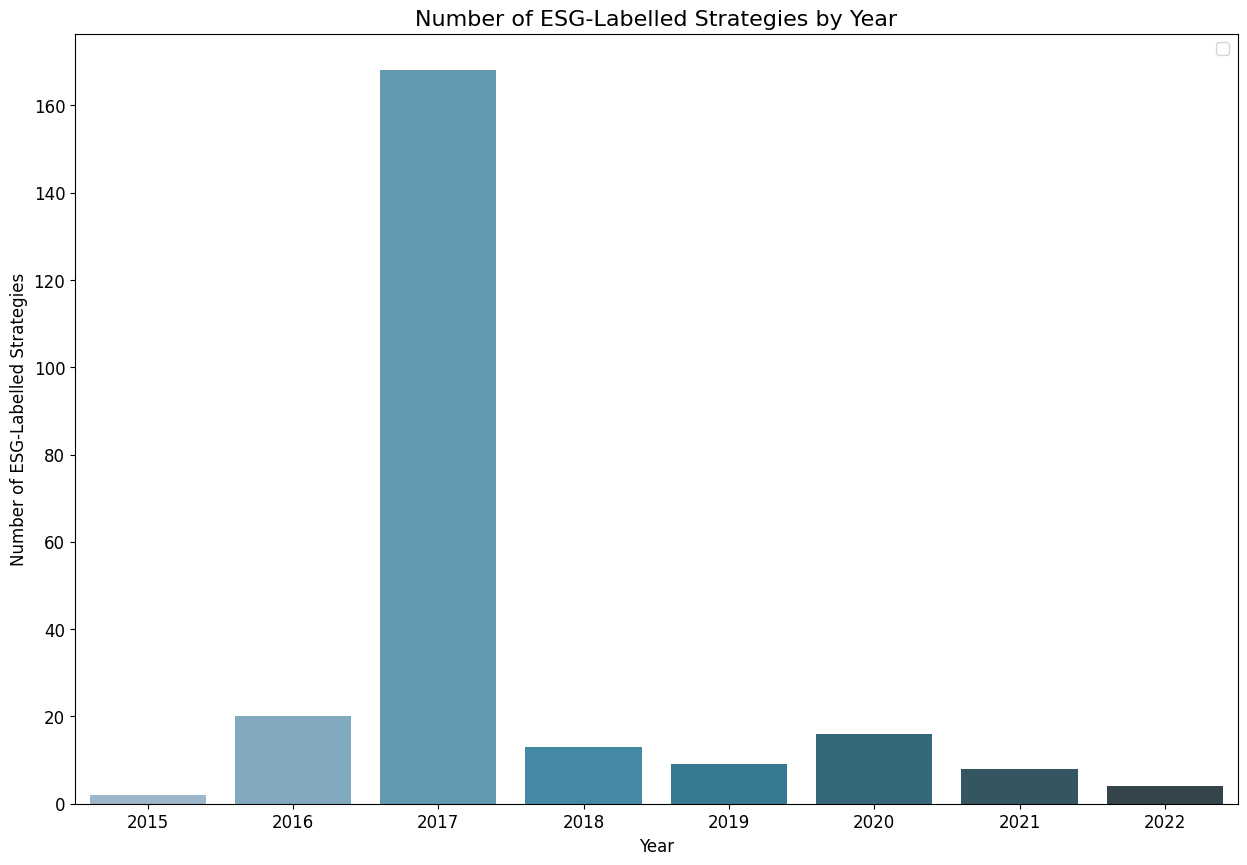

In [141]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='year', y='no_of_esg_strategies', data=pct_esg_strategies, palette='PuBuGn_d')
ax.set_title('Number of ESG-Labelled Strategies by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of ESG-Labelled Strategies', fontsize=12)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)

### <font color = 'green'> Why so many ESG-labelled strateiges in 2017? </font>

In [127]:
#esg labels in 2017
esg_labels_2017 = clickhouse_query('''
select esg_labels, 
count(case when strategy != '' then 1 end) as no_of_strategies,
count(case when strategy != '' then 1 end) * 100.0 / sum(count(case when strategy != '' then 1 end)) over () as pct_of_strategies
from common_goods.last_entry
where year = 2017 and esg_labels != 'Non-ESG'
group by esg_labels
order by count(*) desc
''')

esg_labels_2017

Elapsed time: 0 days 00:00:00.001000 seconds


,esg_labels,no_of_strategies,pct_of_strategies
0,Corporate Governance,169,96.571429
1,Climate Change,3,1.714286
2,Community Relations,2,1.142857
3,Human Capital,1,0.571429


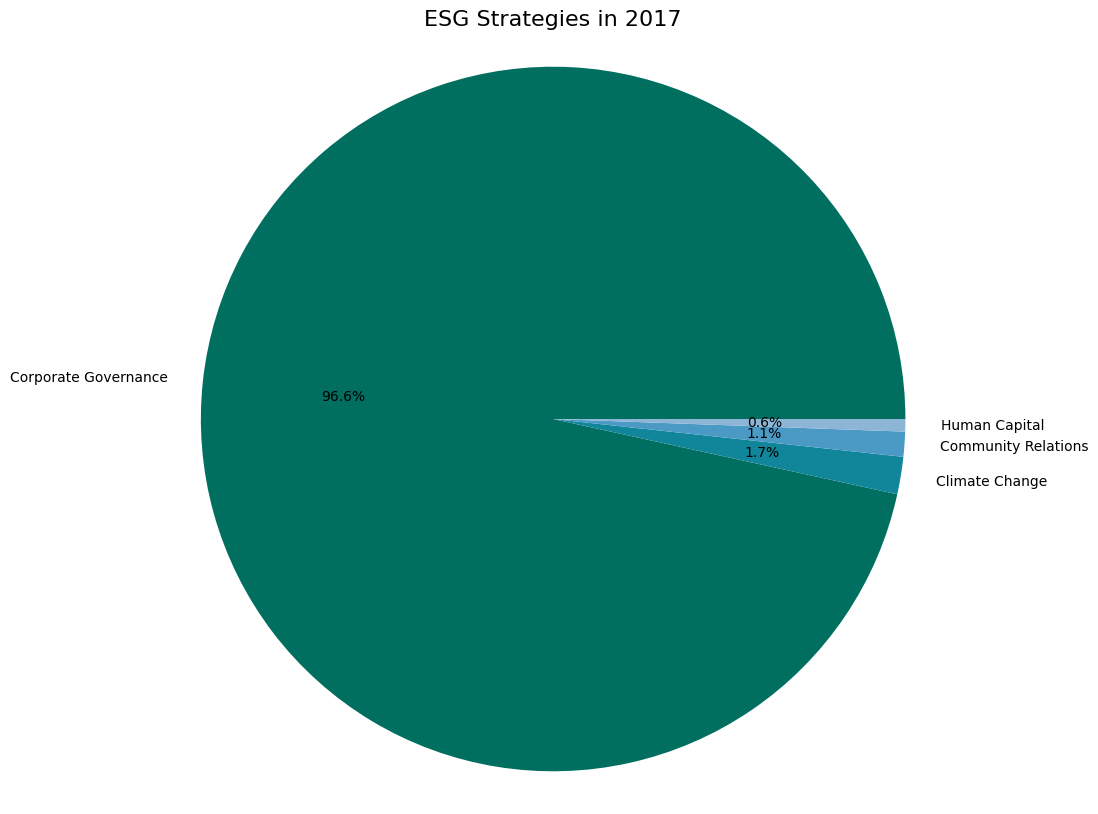

In [130]:
#draw a pie chart to show the distribution of esg labels

labels = esg_labels_2017['esg_labels'].tolist()
sizes = esg_labels_2017['pct_of_strategies'].tolist()

fig, ax = plt.subplots(figsize=(10, 10))
colors = sns.color_palette('PuBuGn_r')[0:5]
ax.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 10})
ax.set_title('ESG Strategies in 2017', fontsize=16)
ax.axis('equal')

plt.show()

We found that most of the esg-labeled strategies in 2017 are labeled as *Corporate Governance*. So, we'd like to check the strategies and see if there is any special reason.

In [137]:
#check the strategies labeled as 'Coporate Governance' in 2017
corporate_governance_2017 = clickhouse_query('''
select year, name, adsh, strategy
from common_goods.last_entry
where esg_labels = 'Corporate Governance' and year = 2017
''')

corporate_governance_2017

Elapsed time: 0 days 00:00:00 seconds


,year,name,adsh,strategy
0,2017,DREYFUS FUND INC,0000030146-17-000010,"To pursue its goals, the fund primarily invest..."
1,2017,"DREYFUS RESEARCH GROWTH FUND, INC",0000030162-17-000008,"To pursue its goals, the fund normally invests..."
2,2017,"DREYFUS SUSTAINABLE U.S. EQUITY FUND, INC.",0000030167-17-000036,"To pursue its goal, the fund normally invests ..."
3,2017,DREYFUS FUNDS INC,0000038403-17-000015,"To pursue its goal, the fund normally invests ..."
4,2017,AMCAP FUND,0000051931-17-000146,The fund invests primarily in common stocks of...
...,...,...,...,...
164,2017,FEDERATED MDT SERIES,0001623632-17-000883,The Fund seeks to achieve its objective by inv...
165,2017,FEDERATED MUNICIPAL SECURITIES INCOME TRUST,0001623632-17-000911,The Fund pursues its objective by investing it...
166,2017,GLOBAL X FUNDS,0001628280-17-000766,The Fund invests at least 80% of its total ass...
167,2017,DAVIS FUNDAMENTAL ETF TRUST,0001670310-17-000022,The Fund is an actively managed exchange-trade...


In [139]:
corporate_governance_2017.to_csv(path + os.sep + 'corporate_governance_2017.csv', index=False)

## <font color = 'green'> Composition of ESG-labeled strategies by year. </font>

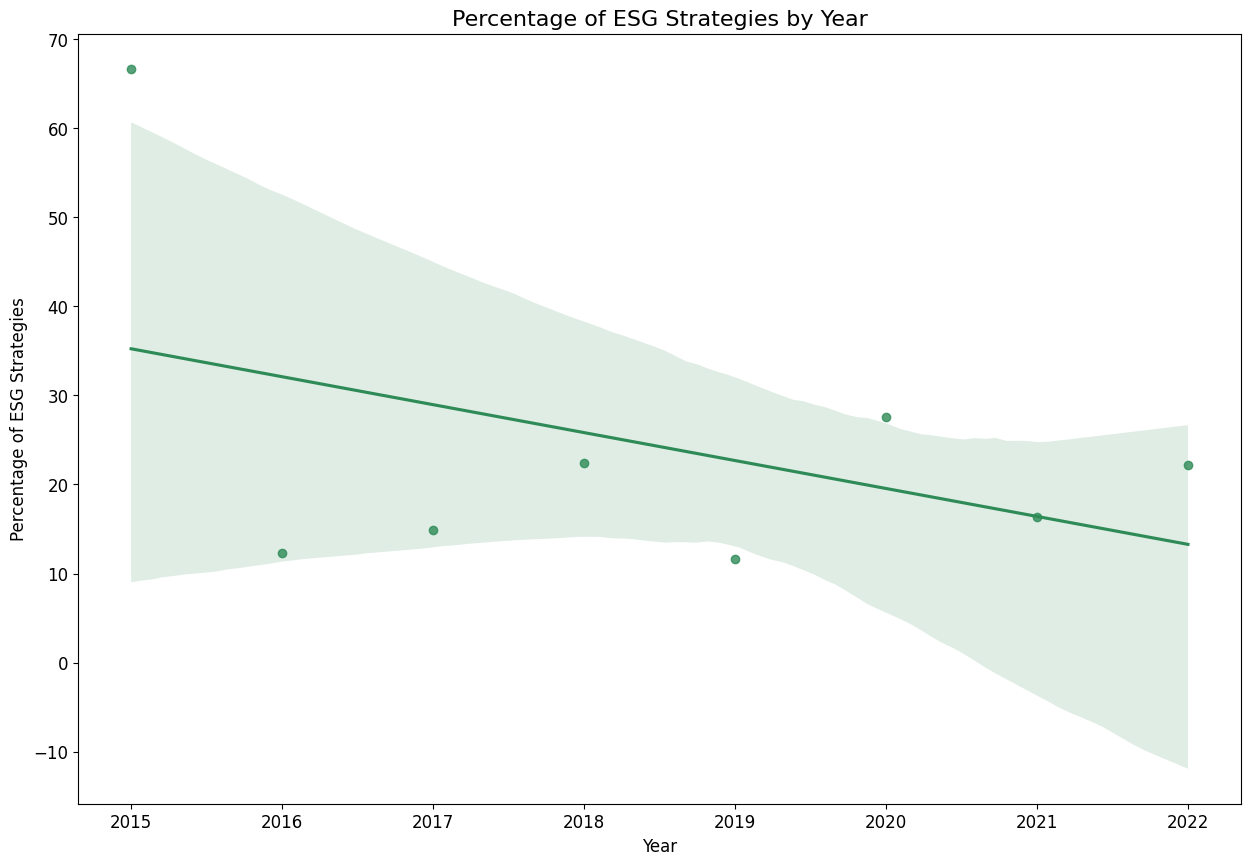

In [111]:
fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x = 'year', y = 'pct_of_esg_strategies', data=pct_esg_strategies, color='seagreen', ax=ax)
ax.set_title('Percentage of ESG Strategies by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage of ESG Strategies', fontsize=12)
ax.tick_params(labelsize=12)

Surprisingly, we found that percentage of ESG-labelled strategies peaked in 2015. So, we'd like to check the strategies in 2015.

In [144]:
#esg labels in 2015
esg_labels_2015 = clickhouse_query('''
select esg_labels, 
count(case when strategy != '' then 1 end) as no_of_strategies,
count(case when strategy != '' then 1 end) * 100.0 / sum(count(case when strategy != '' then 1 end)) over () as pct_of_strategies
from common_goods.last_entry
where year = 2015
group by esg_labels
order by count(*) desc
''')

esg_labels_2015

Elapsed time: 0 days 00:00:00 seconds


,esg_labels,no_of_strategies,pct_of_strategies
0,Corporate Governance,2,66.666667
1,Non-ESG,1,33.333333


In [177]:
#total number of strategies in each year
clickhouse_query('''
select year, count(*) as no_of_strategies
from common_goods.last_entry
where year != 0
group by year
order by year asc
''')

Elapsed time: 0 days 00:00:00 seconds


,year,no_of_strategies
0,2015,3
1,2016,163
2,2017,1129
3,2018,58
4,2019,77
5,2020,58
6,2021,49
7,2022,18


We can see that this is due to the denominator effect, i.e., there are too few observations in 2015. So, we exclude the year 2015 and check the trend again.

In [181]:
#percentage of esg strategies in each year excluding 2015
pct_esg_strategies_since_2016 = clickhouse_query('''
select year, count(case when esg_labels != 'Non-ESG' then 1 end) / count(*) * 100 as pct_of_esg_strategies
from common_goods.last_entry
where year > 2015
group by year
order by year
''')

pct_esg_strategies_since_2016

Elapsed time: 0 days 00:00:00 seconds


,year,pct_of_esg_strategies
0,2016,12.269939
1,2017,14.880425
2,2018,22.413793
3,2019,11.688312
4,2020,27.586207
5,2021,16.326531
6,2022,22.222222


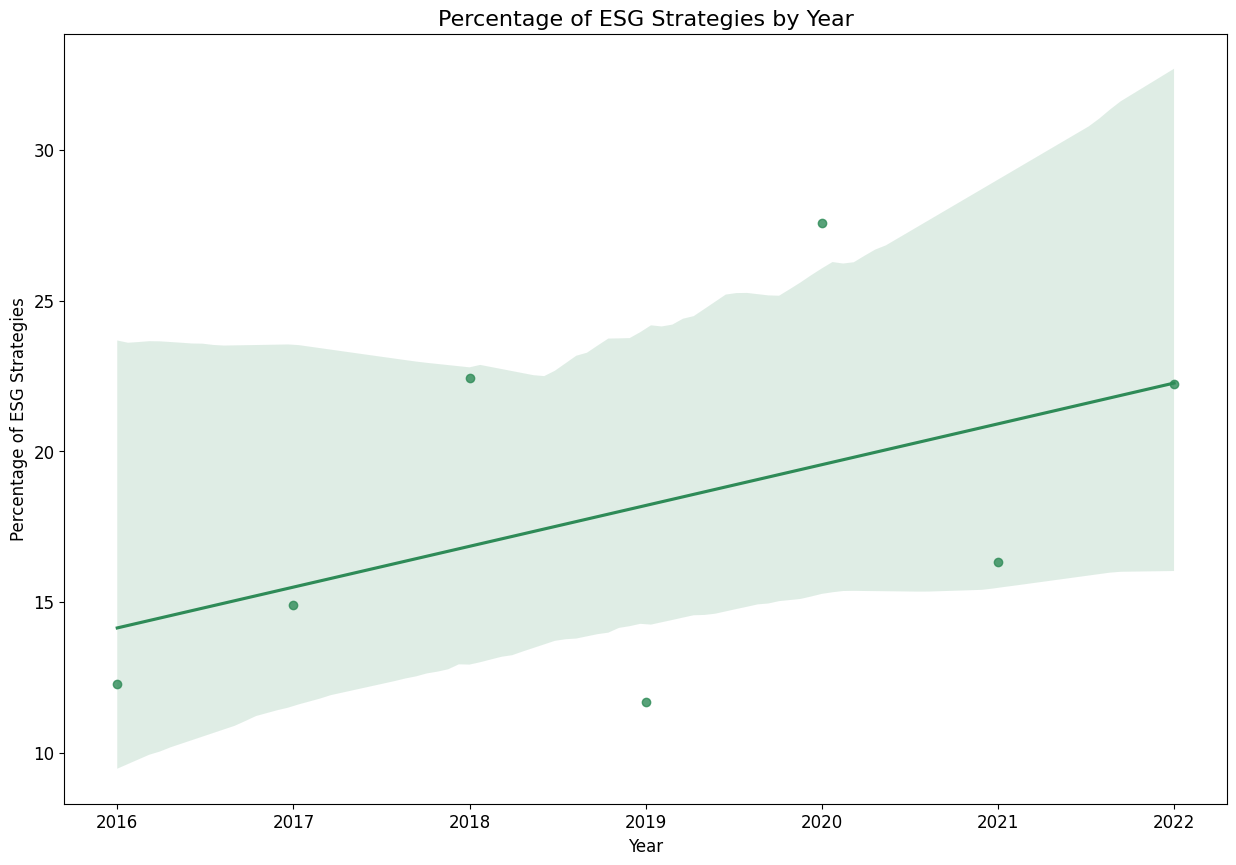

In [182]:
#plot
fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x = 'year', y = 'pct_of_esg_strategies', data=pct_esg_strategies_since_2016, color='seagreen', ax=ax)
ax.set_title('Percentage of ESG Strategies by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage of ESG Strategies', fontsize=12)
ax.tick_params(labelsize=12)

Now we can see a upward trend of ESG-labelled strategies.

## <font color = 'green'> ESG Strategies with each ESG label. </font>

In [157]:
#count labels for each year
esg_strategies_yearly = clickhouse_query('''
select year, esg_labels, count(*) as no_of_labels,
count(*)/ sum(count(esg_labels)) over (partition by year) *100 as pct_of_labels
from common_goods.last_entry
where year != 0 and esg_labels != 'Non-ESG'
group by year, esg_labels
order by year, count(*) desc
''')

esg_strategies_yearly

Elapsed time: 0 days 00:00:00 seconds


,year,esg_labels,no_of_labels,pct_of_labels
0,2015,Corporate Governance,2,100.000000
1,2016,Corporate Governance,18,90.000000
2,2016,Community Relations,1,5.000000
3,2016,Climate Change,1,5.000000
4,2017,Corporate Governance,163,97.023810
5,2017,Climate Change,3,1.785714
6,2017,Community Relations,1,0.595238
7,2017,Human Capital,1,0.595238
8,2018,Corporate Governance,12,92.307692
9,2018,Human Capital,1,7.692308


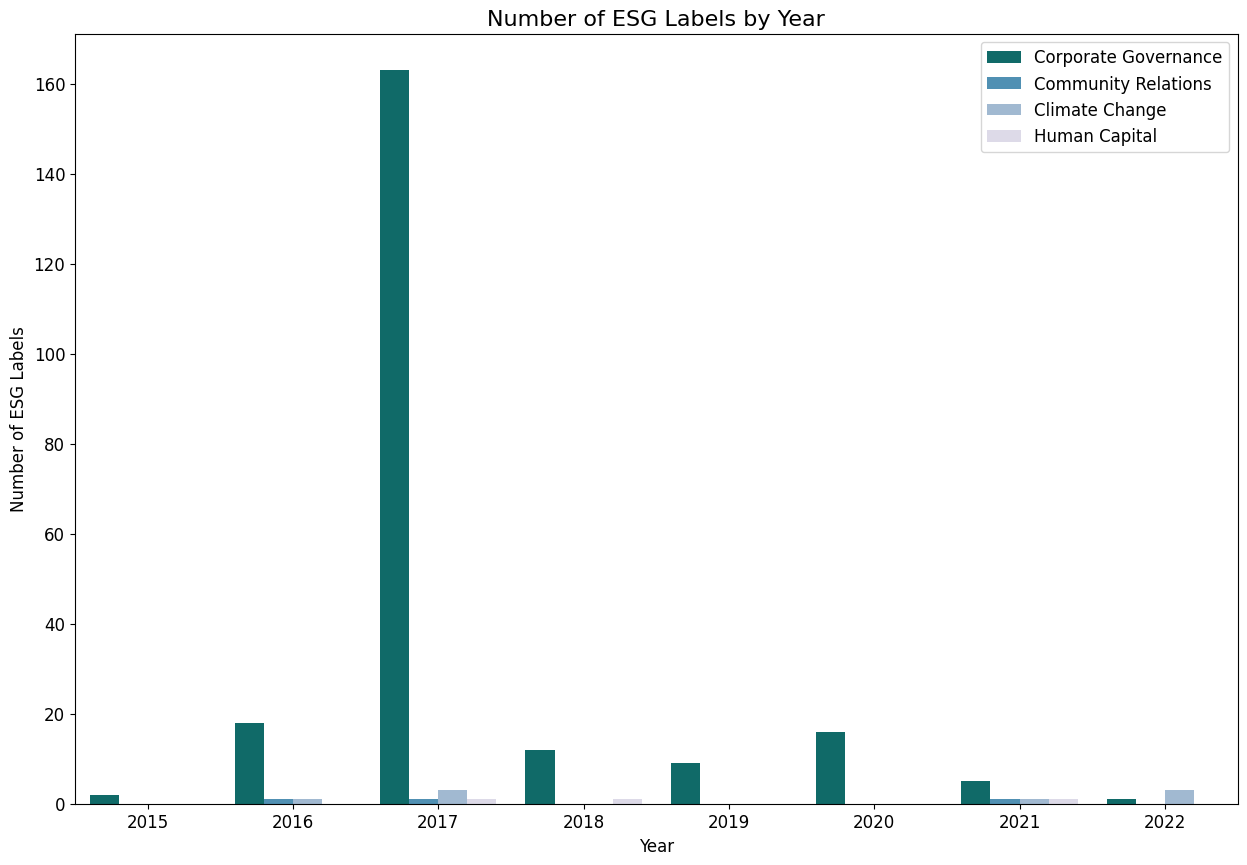

In [149]:
esg_strategies_yearly['year'] = esg_strategies_yearly['year'].astype(str)

fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='year', y='no_of_labels', hue='esg_labels', palette='PuBuGn_r', data=esg_strategies_yearly, ax=ax)
ax.set_title('Number of ESG Labels by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of ESG Labels', fontsize=12)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)

plt.show()

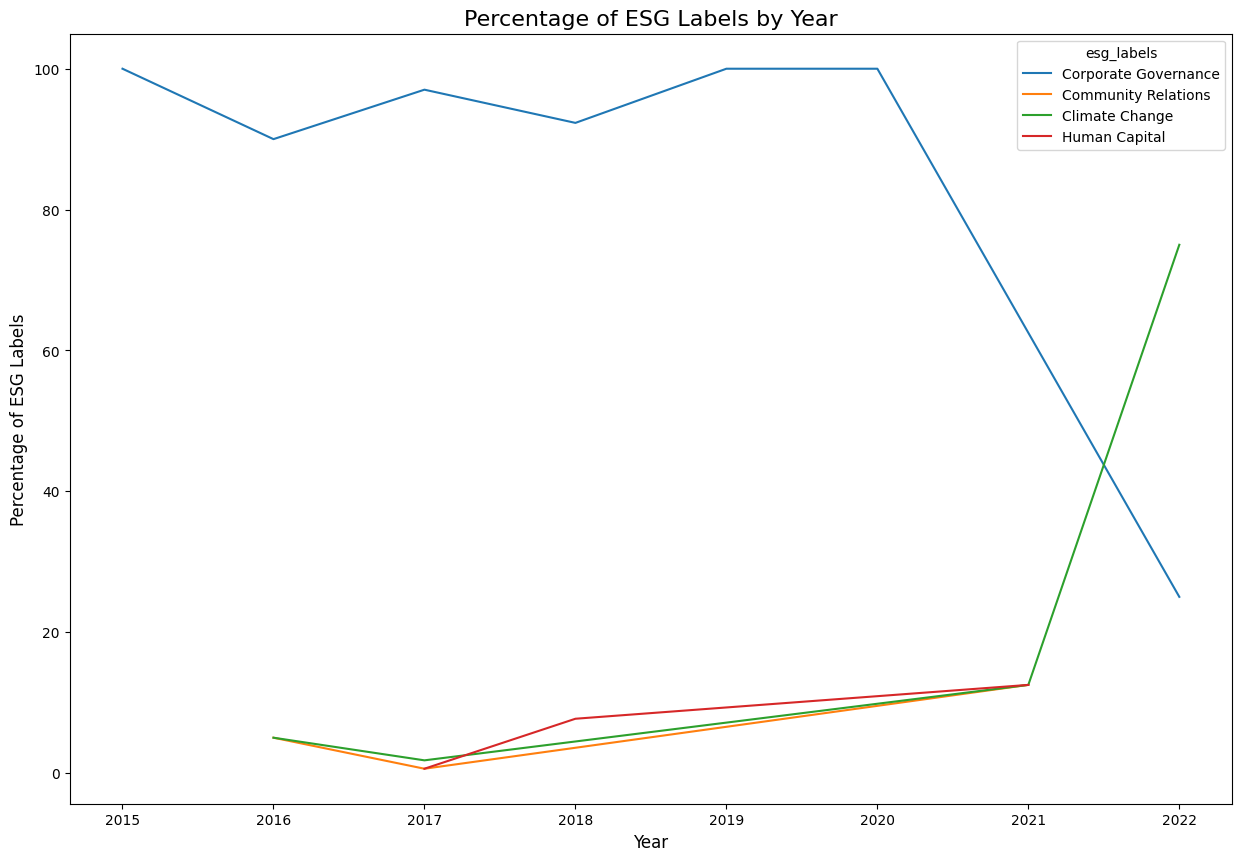

In [184]:
#plot percentage of esg labels by year
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(x='year', y='pct_of_labels', hue='esg_labels', data=esg_strategies_yearly, ax=ax)
ax.set_title('Percentage of ESG Labels by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage of ESG Labels', fontsize=12)

plt.show()

*Corporate Governance* dominate in every year before 2022. Other labels co-move. </br>

# <font color = 'green'> 2. Trend of ESG-labeled funds by year. </font>

In [274]:
esg_labelled_funds = clickhouse_query('''
select year, no_of_funds,
100 - no_of_funds * 100.0 / total_no_of_funds as pct_of_esg_funds
from (select 
year, esg_labels, count(distinct cik_expanded) as no_of_funds,
sum(count(distinct cik_expanded)) over (partition by year) as total_no_of_funds
from common_goods.last_entry
where year != 0
group by year, esg_labels) 
where esg_labels = 'Non-ESG'
order by year asc
''')

esg_labelled_funds

Elapsed time: 0 days 00:00:00 seconds


,year,no_of_funds,pct_of_esg_funds
0,2015,1,66.666667
1,2016,143,12.269939
2,2017,951,14.937388
3,2018,45,22.413793
4,2019,68,11.688312
5,2020,42,27.586207
6,2021,41,16.326531
7,2022,14,22.222222


## <font color = 'green'> Number of ESG-labeled funds by year. </font>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


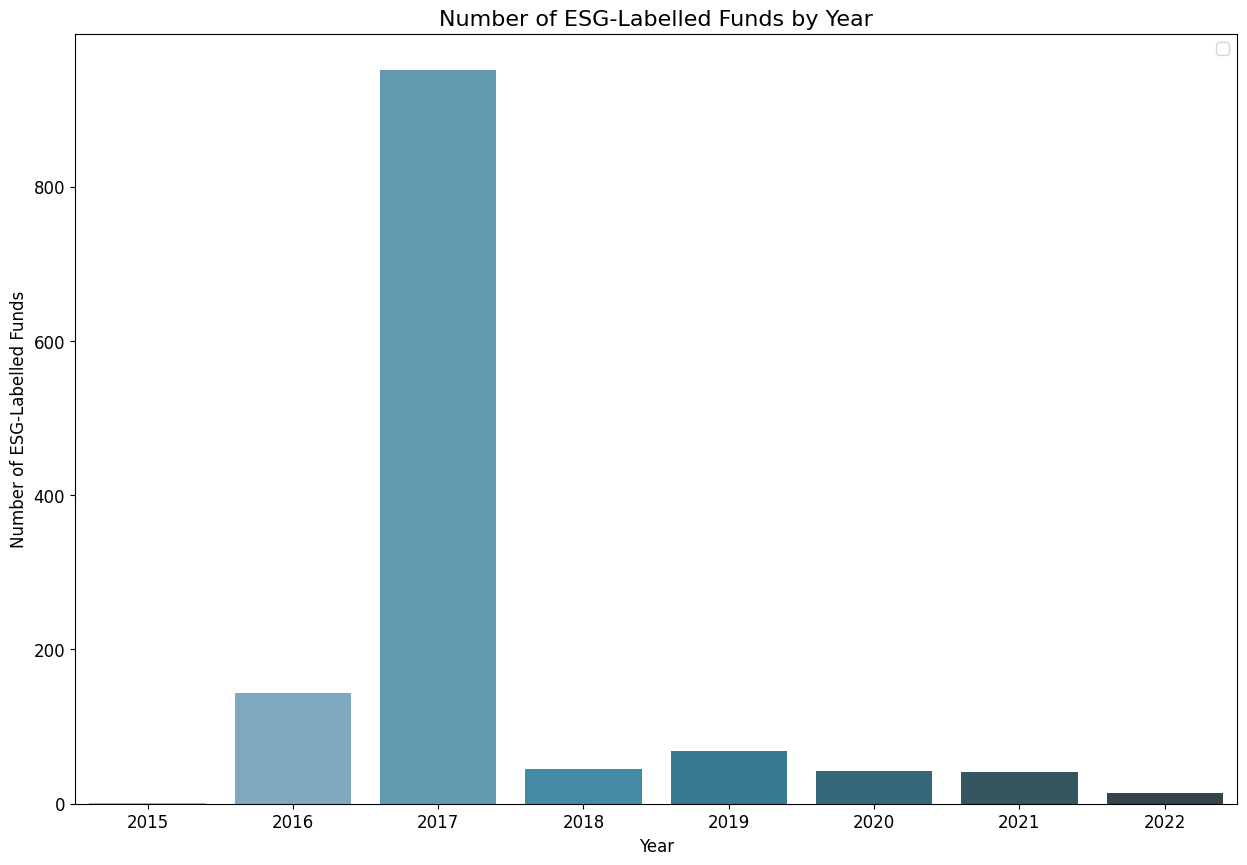

In [275]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.barplot(x='year', y='no_of_funds', data=esg_labelled_funds, palette='PuBuGn_d')
ax.set_title('Number of ESG-Labelled Funds by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Number of ESG-Labelled Funds', fontsize=12)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)

## <font color = 'green'> Percentage of ESG-labeled funds by year. </font>

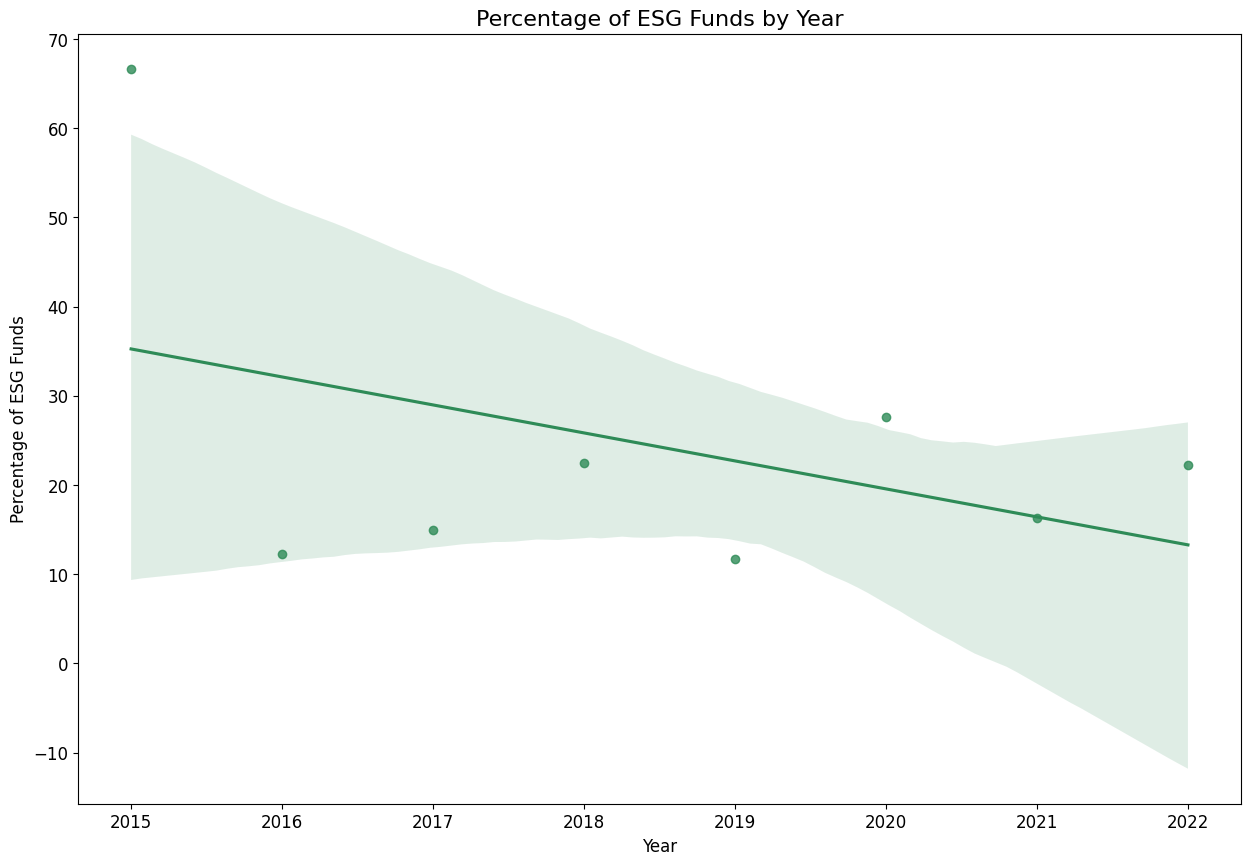

In [276]:
esg_labelled_funds['year'] = esg_labelled_funds['year'].astype(float)

fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x='year', y='pct_of_esg_funds', data=esg_labelled_funds, ax=ax, color='seagreen')
ax.set_title('Percentage of ESG Funds by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage of ESG Funds', fontsize=12)
ax.tick_params(labelsize=12)

plt.show()

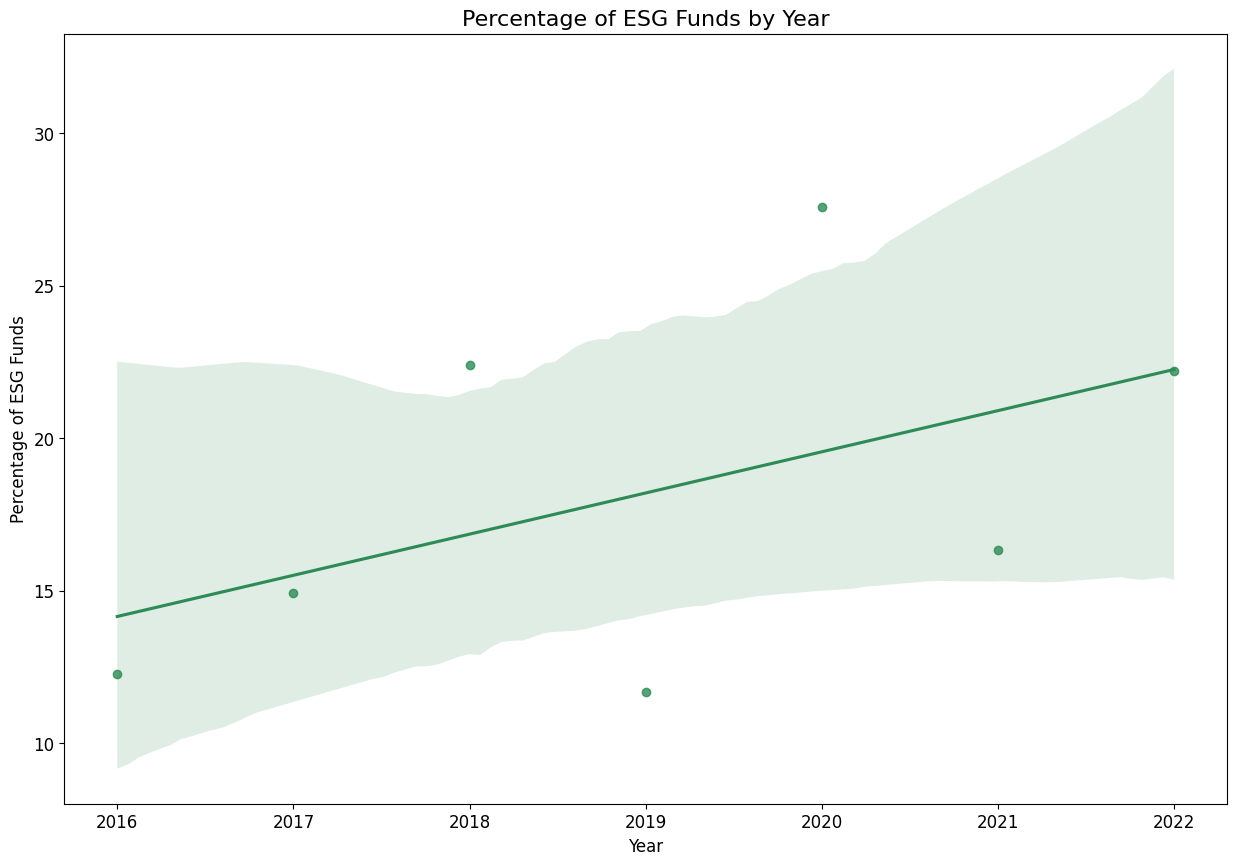

In [277]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(x='year', y='pct_of_esg_funds', data=esg_labelled_funds[1:], ax=ax, color='seagreen')
ax.set_title('Percentage of ESG Funds by Year', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Percentage of ESG Funds', fontsize=12)
ax.tick_params(labelsize=12)

plt.show()

Similar to the trend of ESG-labeled strategies, we can see a upward trend of ESG-labelled funds since 2016.

## <font color = 'green'> Funds trading within each ESG label. </font>

In [278]:
esg_funds = clickhouse_query('''
select esg_labels, count(distinct cik_expanded) as no_of_funds,
count(distinct cik_expanded) * 100.0 / sum(count(distinct cik_expanded)) over () as pct_of_funds
from common_goods.last_entry
where esg_labels != 'Non-ESG'
group by esg_labels
order by count(distinct cik_expanded) desc
''')

esg_funds

Elapsed time: 0 days 00:00:00 seconds


,esg_labels,no_of_funds,pct_of_funds
0,Corporate Governance,213,93.832599
1,Climate Change,8,3.524229
2,Human Capital,3,1.321586
3,Community Relations,3,1.321586


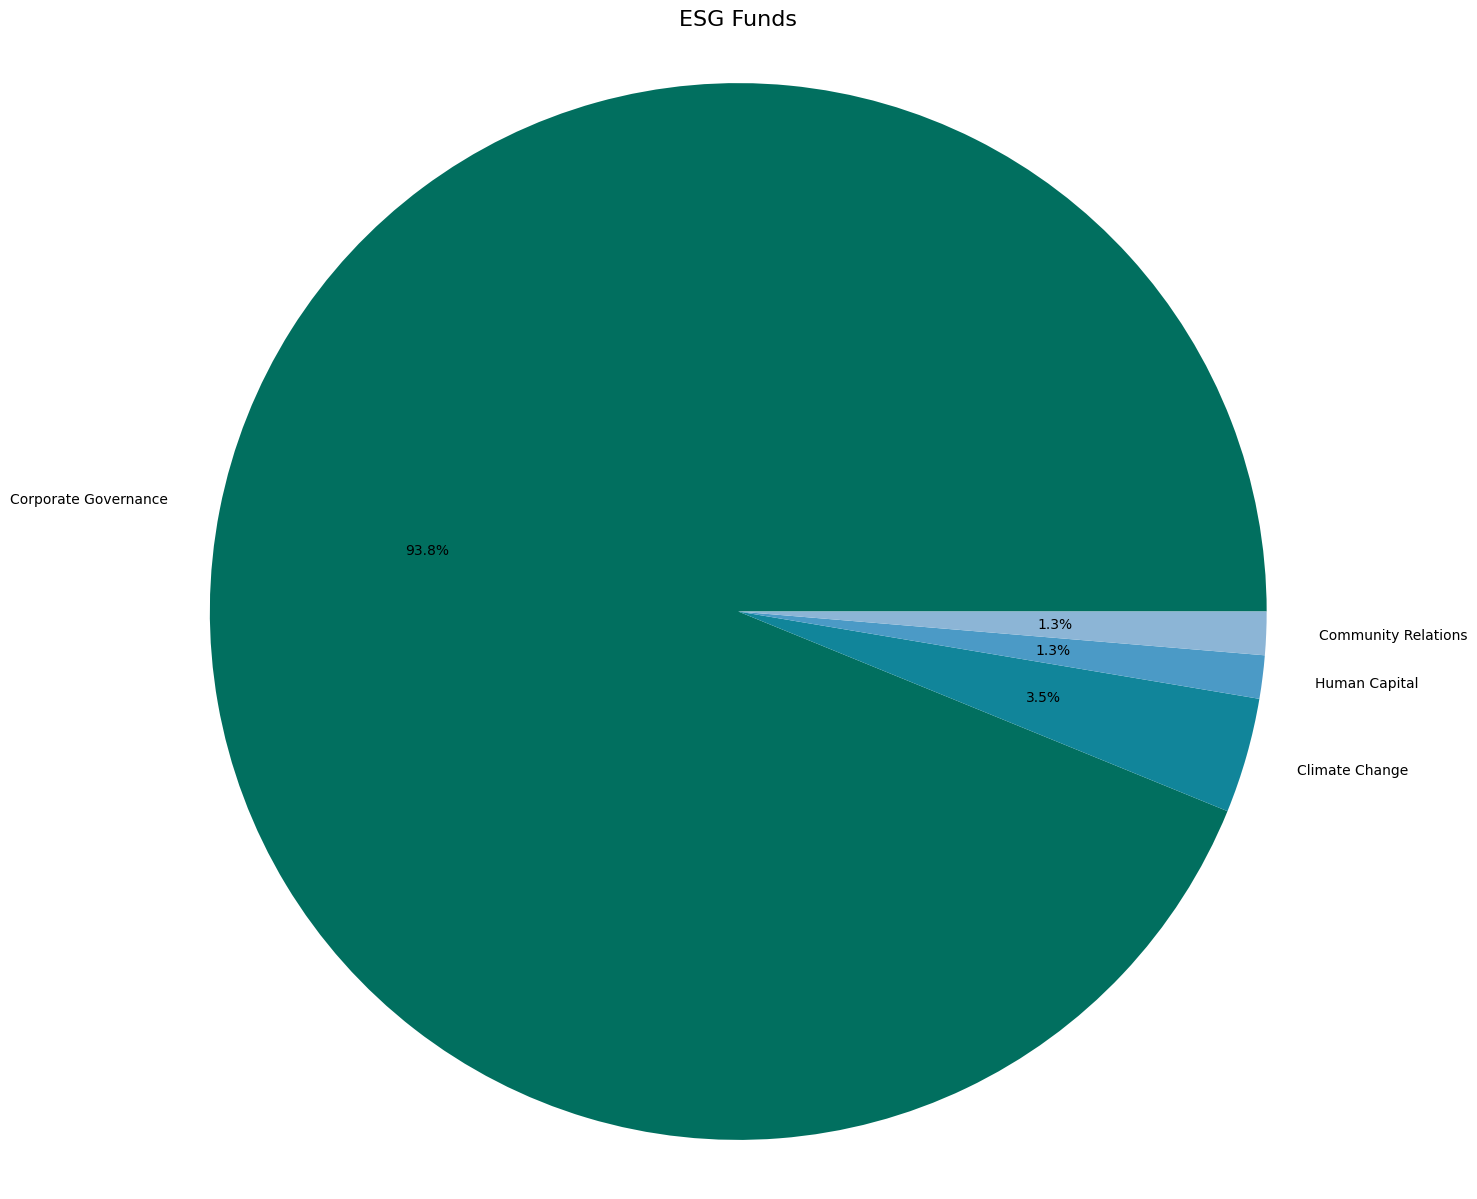

In [279]:
labels = esg_funds['esg_labels'].tolist()
sizes = esg_funds['pct_of_funds'].tolist()

fig, ax = plt.subplots(figsize=(15, 15))
colors = sns.color_palette('PuBuGn_r')[0:5]
ax.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=0, textprops={'fontsize': 10})
ax.set_title('ESG Funds', fontsize=16)
ax.axis('equal')

plt.show()

In [285]:
#check which funds are trading Coporate Governance
corporate_governance_funds = clickhouse_query('''
select distinct cik_expanded, name, year
from common_goods.last_entry
where esg_labels = 'Corporate Governance'
and year != 0
order by year, name  asc
''')

corporate_governance_funds

Elapsed time: 0 days 00:00:00 seconds


,cik_expanded,name,year
0,1364089,CLAYMORE EXCHANGE-TRADED FUND TRUST,2015
1,1365662,CLAYMORE EXCHANGE-TRADED FUND TRUST 2,2015
2,812015,AB PORTFOLIOS,2016
3,914775,"ADVANTAGE FUNDS, INC.",2016
4,1105446,"CALVERT RESPONSIBLE INDEX SERIES, INC.",2016
...,...,...,...
221,732041,"FPA U.S. CORE EQUITY FUND, INC.",2021
222,860720,MORGAN STANLEY EUROPE OPPORTUNITY FUND INC.,2021
223,1848758,SHP ETF TRUST,2021
224,867297,VIRTUS INVESTMENT TRUST,2021


In [286]:
# check which funds are trading Climate Change

climate_change_funds = clickhouse_query('''
select distinct cik_expanded, name, year
from common_goods.last_entry
where esg_labels = 'Climate Change'
order by year, name asc
''')

climate_change_funds

Elapsed time: 0 days 00:00:00 seconds


,cik_expanded,name,year
0,1579982,ARK ETF TRUST,2016
1,1467831,ETF MANAGERS TRUST,2017
2,917124,FIRSTHAND FUNDS,2017
3,1095726,NATIXIS FUNDS TRUST IV,2017
4,1831313,ENGINE NO. 1 ETF TRUST,2021
5,110055,"BLACKROCK SUSTAINABLE BALANCED FUND, INC.",2022
6,1324285,BLACKROCK UNCONSTRAINED EQUITY FUND,2022
7,1506001,NEUBERGER BERMAN ETF TRUST,2022


In [287]:
# check which funds are trading Human Capital
human_capital_funds = clickhouse_query('''
select distinct cik_expanded, name, year
from common_goods.last_entry
where esg_labels = 'Human Capital'
order by year, name asc
''')
human_capital_funds

Elapsed time: 0 days 00:00:00 seconds


,cik_expanded,name,year
0,1377031,EPIPHANY FUNDS,2017
1,1722388,IMPACT SHARES TRUST I,2018
2,1821080,HUMANKIND BENEFIT CORP,2021


In [288]:
# check which funds are trading Community Relations
community_relations_funds = clickhouse_query('''
select distinct cik_expanded, name, year
from common_goods.last_entry
where esg_labels = 'Community Relations'
order by year, name asc
''')
community_relations_funds

Elapsed time: 0 days 00:00:00 seconds


,cik_expanded,name,year
0,1141819,TRUST FOR PROFESSIONAL MANAGERS,2016
1,1481686,NILE CAPITAL INVESTMENT TRUST,2017
2,1785243,UNCOMMON INVESTMENT FUNDS TRUST,2021


# <font color = 'green'> 3. Who are ESG leaders? 

* Number of ESG-labelled funds 
* Time of ESG-labelled funds

</font>

Firstly, we perform sentiment analysis on ESG-labelled funds' objectives.

In [205]:
from installdatabase import *
import os
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm, trange

In [296]:
#BLACKROCK
blackrock = clickhouse_query('''
select esg_labels, count(cik_expanded) as number_of_funds
from common_goods.last_entry
where year != 0
and name like '%BLACKROCK%'
group by esg_labels
''')

blackrock

Elapsed time: 0 days 00:00:00 seconds


,esg_labels,number_of_funds
0,Non-ESG,35
1,Climate Change,2


In [298]:
#PIMCO
pimco = clickhouse_query('''
select esg_labels, count(cik_expanded) as number_of_funds
from common_goods.last_entry
where year != 0
and name like '%PIMCO%'
group by esg_labels
''')

pimco

Elapsed time: 0 days 00:00:00 seconds


,esg_labels,number_of_funds
0,Non-ESG,3


In [299]:
#PARNUSSUS
parnussus = clickhouse_query('''
select esg_labels, count(cik_expanded) as number_of_funds
from common_goods.last_entry
where year != 0
and name like '%PARNASSUS%'
group by esg_labels
''')

parnussus

Elapsed time: 0 days 00:00:00 seconds


,esg_labels,number_of_funds
0,Corporate Governance,2


In [310]:
#JP MORGAN
jpm = clickhouse_query('''
select esg_labels, count(cik_expanded) as number_of_funds
from common_goods.last_entry
where year != 0
and name like '%JP%'
group by esg_labels
''')

jpm

Elapsed time: 0 days 00:00:00.000995 seconds


,esg_labels,number_of_funds
0,Non-ESG,4
1,Corporate Governance,3


# <font color = 'green'> Summary of Fundings:

1. Most of the MF investment strategies are not related to ESG.
2. The trend of ESG surfaced in 2015 and climb up since then.
3. Funds are more likely to invest within *Corporate Governance*.

All in all, it seems not a good taxonomy. So, we try to create out own taxonomy in the next section instead.

</font>